In [1]:


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np




In [2]:
l1 = np.loadtxt('phi_tIC_1_cos_corr.dat')

l2 = np.loadtxt('phi_tIC_1_sin_corr.dat')

l3 = np.loadtxt('phi_tIC_2_cos_corr.dat')

l4 = np.loadtxt('phi_tIC_2_sin_corr.dat')

sum_corr = np.zeros(len(l1))

#some over tica and sine/cosine
f2 = open('phi_sum_correlation_seperate_chain.dat','w')
for i in range(len(l1)):
    sum_corr[i] = abs(l1[i,1]) + abs(l2[i,1]) + abs(l3[i,1]) + abs(l4[i,1])
    print(int(l1[i,0]),sum_corr[i],file=f2)
f2.close()


In [3]:
l = np.loadtxt("phi_sum_correlation_seperate_chain.dat")


sorted_sum = l[np.argsort(l[:, 1])]
sorted_sum = np.flip(sorted_sum,0)

def get_chain(index):
    '''decide which chain'''

    if index <= 1146:
        chain = 'A'
    elif index > 1146 and index <= 2292:
        chain = 'B'
    elif index > 2292:
        chain = 'C'
    return chain

f1 = open('phi_sum_correlations_verbose.dat','w')

f2 = open('phi_sum_correlations_verbose_top_100.dat','w')


for i in range(len(l)):
    chain = get_chain(int(sorted_sum[i,0]))
    if chain == 'A' :
        resid = int(sorted_sum[i,0])
    elif chain == 'B':
        resid = int(sorted_sum[i,0]) - 1146
    elif chain == 'C':
        resid = int(sorted_sum[i,0]) - 2292
    print('Chain'+' '+ chain +': Residue '+ str(resid),sorted_sum[i,1],file=f1)
    if i<100:
        print('Chain'+' '+ chain +': Residue '+ str(resid),sorted_sum[i,1],file=f2)
f1.close()
f2.close()

phi_sorted_sum = sorted_sum.copy()

In [4]:
l1 = np.loadtxt('psi_tIC_1_cos_corr.dat')

l2 = np.loadtxt('psi_tIC_1_sin_corr.dat')

l3 = np.loadtxt('psi_tIC_2_cos_corr.dat')

l4 = np.loadtxt('psi_tIC_2_sin_corr.dat')

sum_corr = np.zeros(len(l1))

#some over tica and sine/cosine
f2 = open('psi_sum_correlation_seperate_chain.dat','w')
for i in range(len(l1)):
    sum_corr[i] = abs(l1[i,1]) + abs(l2[i,1]) + abs(l3[i,1]) + abs(l4[i,1])
    print(int(l1[i,0]),sum_corr[i],file=f2)
f2.close()

In [5]:
l = np.loadtxt("psi_sum_correlation_seperate_chain.dat")


sorted_sum = l[np.argsort(l[:, 1])]
sorted_sum = np.flip(sorted_sum,0)

def get_chain(index):
    '''decide which chain'''

    if index <= 1146:
        chain = 'A'
    elif index > 1146 and index <= 2292:
        chain = 'B'
    elif index > 2292:
        chain = 'C'
    return chain

f1 = open('psi_sum_correlations_verbose.dat','w')

f2 = open('psi_sum_correlations_verbose_top_100.dat','w')


for i in range(len(l)):
    chain = get_chain(int(sorted_sum[i,0]))
    if chain == 'A' :
        resid = int(sorted_sum[i,0])
    elif chain == 'B':
        resid = int(sorted_sum[i,0]) - 1146
    elif chain == 'C':
        resid = int(sorted_sum[i,0]) - 2292
    print('Chain'+' '+ chain +': Residue '+ str(resid),sorted_sum[i,1],file=f1)
    if i<100:
        print('Chain'+' '+ chain +': Residue '+ str(resid),sorted_sum[i,1],file=f2)
f1.close()
f2.close()

psi_sorted_sum = sorted_sum.copy()

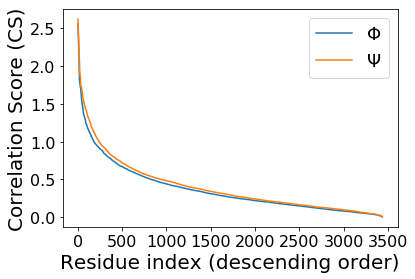

In [11]:
xx = np.arange(len(sorted_sum))
plt.plot(xx,phi_sorted_sum[:,1],label='$\Phi$')
plt.plot(xx,psi_sorted_sum[:,1],label='$\Psi$')
plt.xlabel('Residue index (descending order)',fontsize=20)
plt.ylabel('Correlation Score (CS)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.savefig('correlation-score-spectra.pdf',bbox_inches='tight')
#plt.xlim(0,100)